Implementation and comparision of LSTM(Long Short Term Memory) and ARIMA(Autoregressive integrated moving average) Neural Networks for the application of Stock Price Prediction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from example_functions import fetch_store, preprocessing_data, generate_sequence, lstm

We shall follow the following steps to achieve the goal:
1. Fetch and store the data(Stock Prices for the past few time intervals).
2. Split the data for Training and Testing.
3. Processing of data to meet the input criterion of the Neural Network Algorithms.
4. Pass the data through LSTM and ARIMA and train the networks.
5. Start Predicting the upcoming Stock Prices for the next few time intervals using the 2 models.
6. Compare the results of the 2 models and conclude.


The following code has all the required functions used by the main function

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
34/34 [==============================] - 6s 47ms/step - loss: 0.0249 - val_loss: 0.0029
Epoch 2/100
34/34 [==============================] - 1s 15ms/step - loss: 0.0011 - v

34/34 [==============================] - 1s 18ms/step - loss: 1.1373e-04 - val_loss: 9.5702e-04
Epoch 70/100
34/34 [==============================] - 1s 18ms/step - loss: 1.1860e-04 - val_loss: 0.0012
Epoch 71/100
34/34 [==============================] - 1s 19ms/step - loss: 1.1494e-04 - val_loss: 9.3732e-04
Epoch 72/100
34/34 [==============================] - 1s 17ms/step - loss: 1.5233e-04 - val_loss: 8.2519e-04
Epoch 73/100
34/34 [==============================] - 1s 18ms/step - loss: 1.1760e-04 - val_loss: 0.0013
Epoch 74/100
34/34 [==============================] - 1s 18ms/step - loss: 1.1748e-04 - val_loss: 0.0018
Epoch 75/100
34/34 [==============================] - 1s 17ms/step - loss: 1.3254e-04 - val_loss: 0.0011
Epoch 76/100
34/34 [==============================] - 1s 16ms/step - loss: 1.3510e-04 - val_loss: 0.0025
Epoch 77/100
34/34 [==============================] - 1s 16ms/step - loss: 1.2663e-04 - val_loss: 0.0016
Epoch 78/100
34/34 [==============================] - 1s

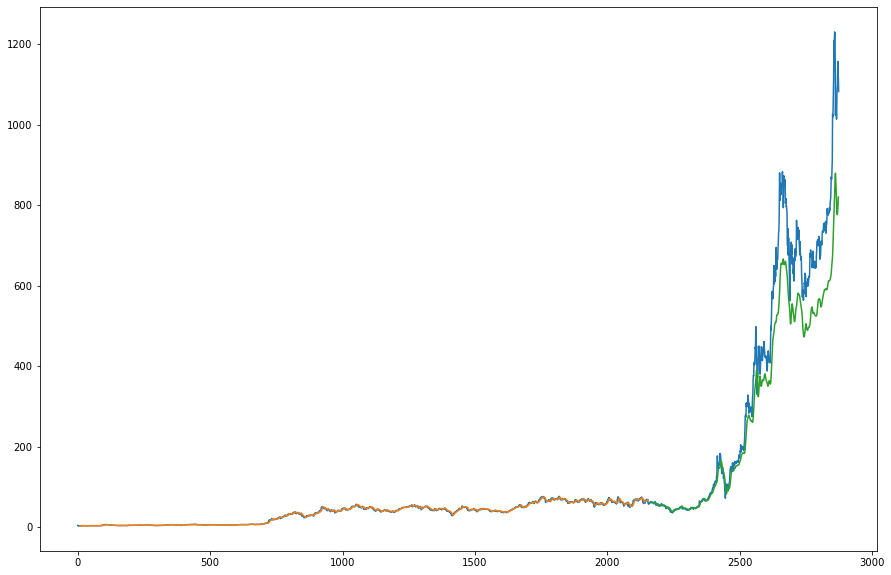

In [2]:
## Configuration Parameters

# Used to divide the data into training set and test set i.e.,
# Percentage of Training data in the whole set of data
percentage_train_data = 0.75

# Dependence Interval specifies the number of previous intervals used
# to predict the next interval's output
dependence_interval = 10

# Number of epochs for LSTM
num_epochs = 100

## Step - 1
# Fetches and Stores data
%run -i example_functions.py
data = fetch_store ()

## Calling LSTM
# Function Description            : This function uses the datat to train, vaidate and fit the model using LSTM
#
## Input Parameters :
# data                            : Input data for training and testing
# percentage_train_data           : Percentage of data used for training from he given set.
# dependence_interval             : The length of the interval that is used by LSTM to estimate the next interval's output
# num_epochs                      : The Number of Epochs used for designing the model for the LSTM
#
## Output Parameters :
# model                           : LSTM Model
# scaler                          : Scaling Model for the data
# processed_data                  : Scaled input data
# train_predict                   : Predictions for trained data
# test_predict                    : Predictions for test data
##
%run -i example_functions.py
model, scaler, processed_data, train_predict, test_predict = lstm (data, percentage_train_data, dependence_interval, num_epochs)

In [3]:
temp_input=list(processed_data[-1*dependence_interval-1:])
lst_output=[]
i=0
while(i<300):
    
    if(len(temp_input)>dependence_interval):
#         print(i)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, dependence_interval, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, dependence_interval,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


Initial data type : <class 'pandas.core.series.Series'> with data :  2873    1116.000000
2874    1081.920044
Name: Close, dtype: float64
2nd array to be appended :  <class 'list'> with lst_out :  [array([826.59646131]), array([799.28950792])]
[]


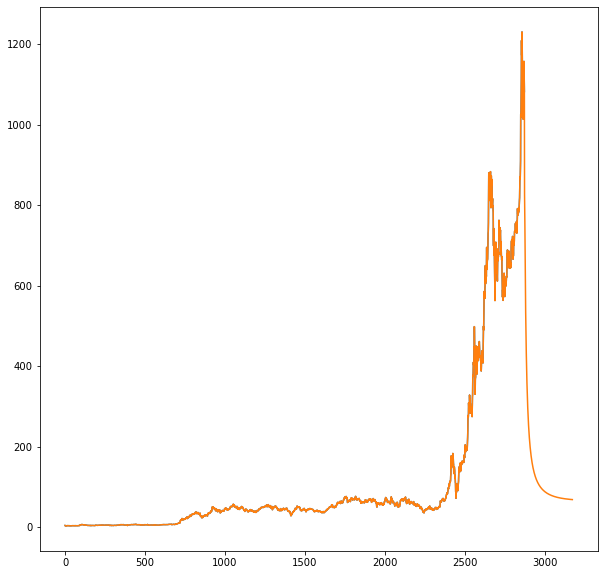

In [4]:
lst_out = list(np.exp(scaler.inverse_transform(lst_output)))

final_data = []
final_data.extend(data)
print("Initial data type :", type(data), "with data : ", data[-2:])
print("2nd array to be appended : ", type(lst_out), "with lst_out : ", lst_out[:2])

for iter in range(len(lst_out)):
    final_data.extend(lst_out[iter].tolist())
    
print(final_data[9998:10002])
plt.figure(figsize=[10,10])
plt.plot(data)
plt.plot(final_data)
plt.show()

